In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [87]:
df_index= pd.read_csv("economic_index.csv")

In [88]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [89]:
## Drop unnecessary columns
df_index.drop(columns=['Unnamed: 0', "year", "month"], axis = 1, inplace=True)

In [90]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [91]:
## Check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

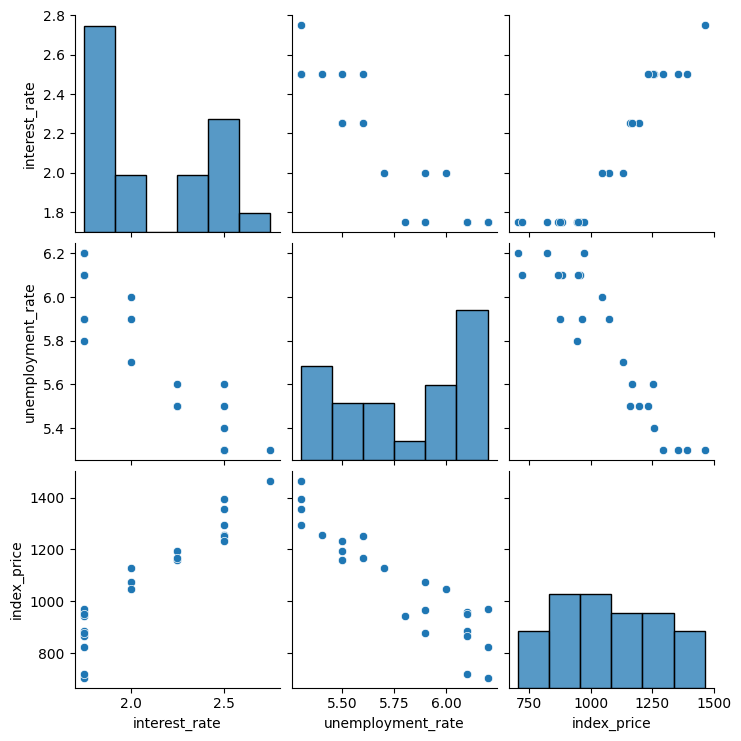

In [92]:
## Lets do Visualization
import seaborn as sns
sns.pairplot(df_index)

In [93]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


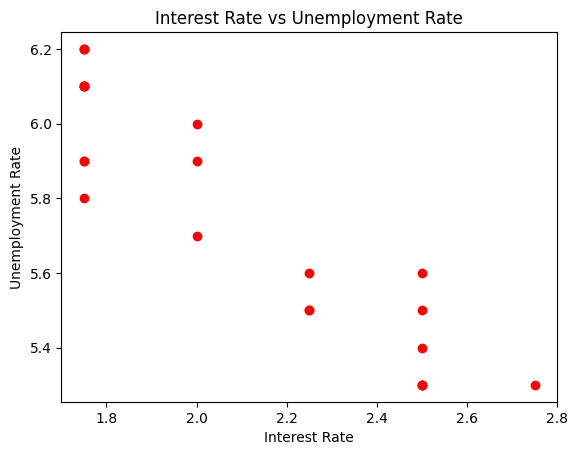

In [94]:
## Visualize the datapoints more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color = 'r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.title('Interest Rate vs Unemployment Rate')
plt.show() 

In [95]:
## Independent and dependent features
X = df_index.iloc[:, :-1]
y = df_index.iloc[:, -1]

In [96]:
X.head(),y

(   interest_rate  unemployment_rate
 0           2.75                5.3
 1           2.50                5.3
 2           2.50                5.3
 3           2.50                5.3
 4           2.50                5.4,
 0     1464
 1     1394
 2     1357
 3     1293
 4     1256
 5     1254
 6     1234
 7     1195
 8     1159
 9     1167
 10    1130
 11    1075
 12    1047
 13     965
 14     943
 15     958
 16     971
 17     949
 18     884
 19     866
 20     876
 21     822
 22     704
 23     719
 Name: index_price, dtype: int64)

In [97]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)    


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

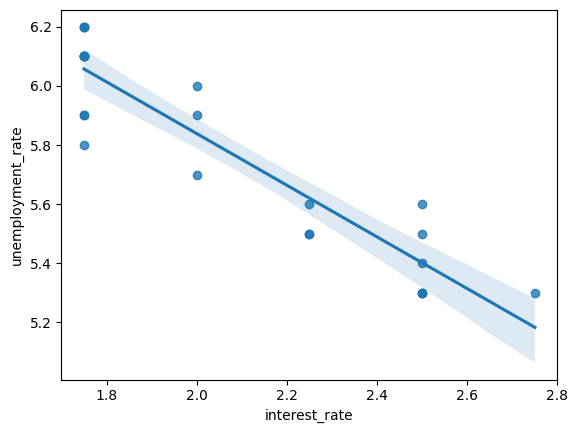

In [98]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [101]:
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

In [102]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [103]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [104]:
regression.fit(X_train, y_train)

LinearRegression()

In [105]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 3)    

In [106]:
np.mean(validation_score)

-5914.828180162386

In [107]:
## Predictions
y_pred = regression.predict(X_test)

In [108]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [109]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  

In [110]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)  
print(rmse)  


8108.567426306604
73.80444932337097
90.04758423359621


## Assumptions

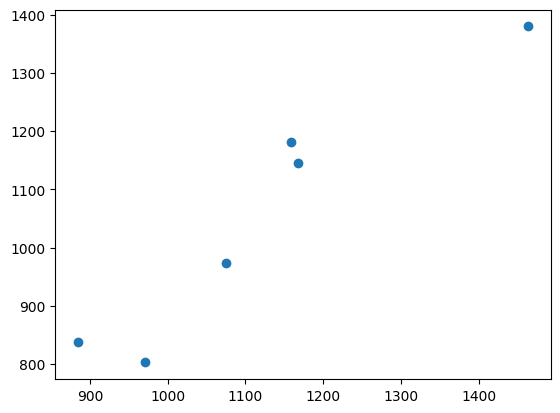

In [111]:
plt.scatter(y_test,y_pred)

In [112]:
residuals = y_test - y_pred
print("Residuals:", residuals)

Residuals: 8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


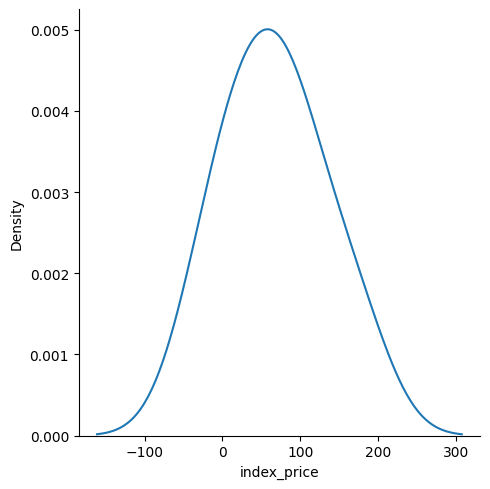

In [113]:
## Plot residuals
sns.displot(residuals, kind="kde")

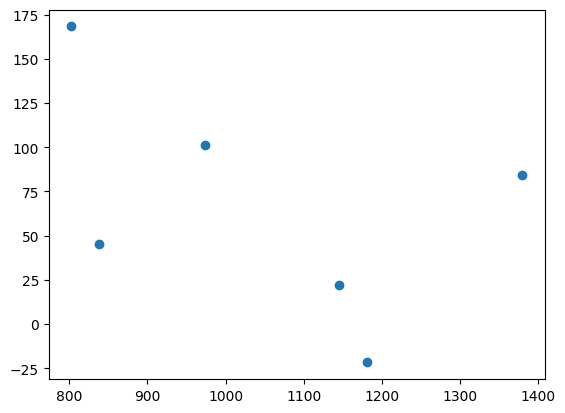

In [114]:
## Scatter plot with respect to predictions and residuals
plt.scatter(y_pred, residuals)

In [ ]:
## OLS Linear Regression
## Ordinary Least Squares
import statsmodels.api as sm


In [117]:
model = sm.OLS(y_train, X_train).fit()

In [118]:
model.summary()

d:\python_3.11\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 29 May 2025   Prob (F-statistic):                       0.754
Time:                        17:56:54   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
print(regression.coef_)

[  88.27275507 -116.25716066]
